# Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clustering

**Introduction: Classification *vs* Clustering**

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

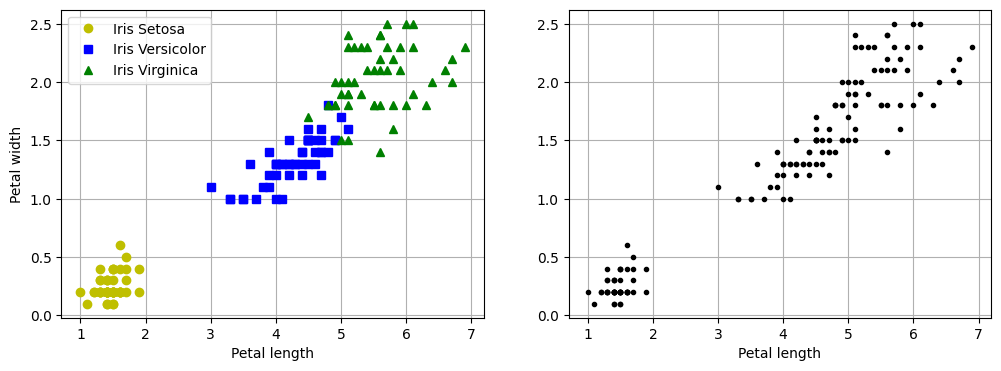

In [3]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(X[:, 2][y == 0], X[:, 3][y == 0], "yo", label="Iris Setosa")
plt.plot(X[:, 2][y == 1], X[:, 3][y == 1], "bs", label="Iris Versicolor")
plt.plot(X[:, 2][y == 2], X[:, 3][y == 2], "g^", label="Iris Virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(X[:, 2], X[:, 3], "k.")
plt.xlabel("Petal length")
plt.grid()

plt.show()

**Note:** The next code cell shows how a Gaussian Mixture model (explained later in this notebook) can actually these clusters quite well using all 4 features: petal length and width, sepal length and width.   

In [4]:
from sklearn.mixture import GaussianMixture

y_predict = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

Next, we map each cluster to a class. Each cluster will have a unique id and here we try to map the cluster's id to the class in the dataset. Instead of hard coding the mapping, we will use `scipy.stats.mode()` function.

In [5]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_predict[y == class_id])
    mapping[mode] = class_id

Then we transform the predicted array to use the class in the dataset, instead of its self-created id, and plot the result.

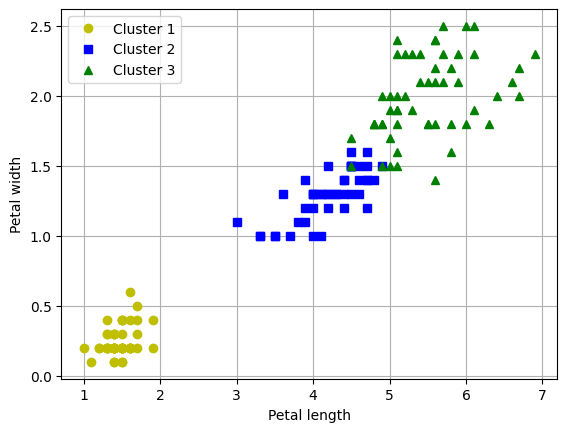

In [6]:
y_predict = np.array([mapping[cluster_id] for cluster_id in y_predict])

plt.plot(X[y_predict == 0, 2], X[y_predict == 0, 3], "yo", label="Cluster 1")
plt.plot(X[y_predict == 1, 2], X[y_predict == 1, 3], "bs", label="Cluster 2")
plt.plot(X[y_predict == 2, 2], X[y_predict == 2, 3], "g^", label="Cluster 3")
plt.grid()
plt.legend()
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.show()

What's the ratio of iris plant we assigned to the right cluster?

In [7]:
(y_predict == y).sum() / len(y)

0.9666666666666667

And we only misclassify 5 of them.

In [8]:
len(y) - (y_predict == y).sum()

5